In [12]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import os


In [13]:

#同一フォルダ内のcsvファイルの名前を取得
def get_csv_files_in_same_folder(path):

    # 現在のノートブックのディレクトリを取得 
    notebook_directory = os.path.dirname(os.path.abspath(path))
    # フォルダ内のファイル一覧を取得
    files = os.listdir(notebook_directory)

    # CSVファイルのみを抽出
    csv_files = [file for file in files if file.endswith(".csv")]
    #csvファイルの名前を出力
    return csv_files

def read_csv(csv_files_list):

    # ファイル名を保存する配列を作成（最低限の大きさで初期化）
    file_names_array = [None] * len(csv_files_list)

    # 配列にファイル名を格納
    for i, csv_file in enumerate(csv_files_list):
        file_names_array[i] = csv_file
    
    #csvの読込み
    read_df = [0]*len(file_names_array)
    for i in range(len(file_names_array)):
        read_df[i] = pd.read_csv(file_names_array[i], encoding="Shift-JIS")

    return read_df

#y_lineをカラム数でループしてcsvデータをすべてプロットする.
def ploter(df_,x_line=0,y_line=1,title='default',data = 1,hit_number=0,hit_parameter=20,hit_flag=False):

    #変数の間
    hit_color="#0000FF"
    no_hit_color="#FF0000"
    font_size = 12
    font_family = 'MS Gothic'
    figsize = (16,4)
    line_width = 2 
    rotation = 0
    HIT = '的中'
    hit_flag = True

    title = title
    xlabel = "Time(sec)"
    ylabel = 'default'

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)

    plt.xlim()
    plt.ylim()

    plt.rcParams["font.size"] = font_size
    plt.rcParams["font.family"] = font_family
    plt.rcParams["figure.figsize"] = figsize

    #各csvファイルを参照する
    for i in range(len(df_)):
        print("i:" + str(i))
        #i番目のcsvを格納
        df = df_[i]
        display(df)

        #i番目のcsvのHITの判定
        if df[HIT][0] == 1:
            hit_number += 1
            hit_flag = True
        elif df[HIT][0] == 0:
            hit_number = hit_number
            hit_flag = False
        else:
            print("errer")
        #i番目のcsvのN番目のカラムをプロット

        #当たった場合:True
        if hit_flag == True:
            #当たった時のグラフ
            plt.plot(df[df.columns[0]],df[df.columns[data]],color="#0000FF",label=HIT)#,label=ylabel,linewidth=line_width)
            
            print("True")
        elif hit_flag == False:
            #外れた時のグラフ
            plt.plot(df[df.columns[0]],df[df.columns[data]],color="#FF0000",label='no' + HIT)

            print("False")
        else:
            print("plot errer")

    print("hit_number:" + str(hit_number))


    plt.legend(ncol=1)
    plt.grid()
    plt.show()


In [15]:
path = r"C:\Users\ginnt\デスクトップ\山下\所作解析テスト"

csv_files_list = get_csv_files_in_same_folder(path)
display(csv_files_list)
df = read_csv(csv_files_list)
display(df)
#ploter(df,x_line=0,y_line=1,hit_flag=False)

['1本目.csv']

[     Time (ms)     Angle 1     Angle 2   的中
 0            0  121.532150  150.902420  1.0
 1           33  121.682869  150.288330  NaN
 2           67  121.783012  149.753052  NaN
 3          100  121.828499  149.351502  NaN
 4          133  121.843307  149.086212  NaN
 ..         ...         ...         ...  ...
 426      14214  133.818970  167.478485  NaN
 427      14248  133.810303  167.468918  NaN
 428      14281  133.806824  167.484665  NaN
 429      14314  133.787766  167.541473  NaN
 430      14348  133.754181  167.629883  NaN
 
 [431 rows x 4 columns]]

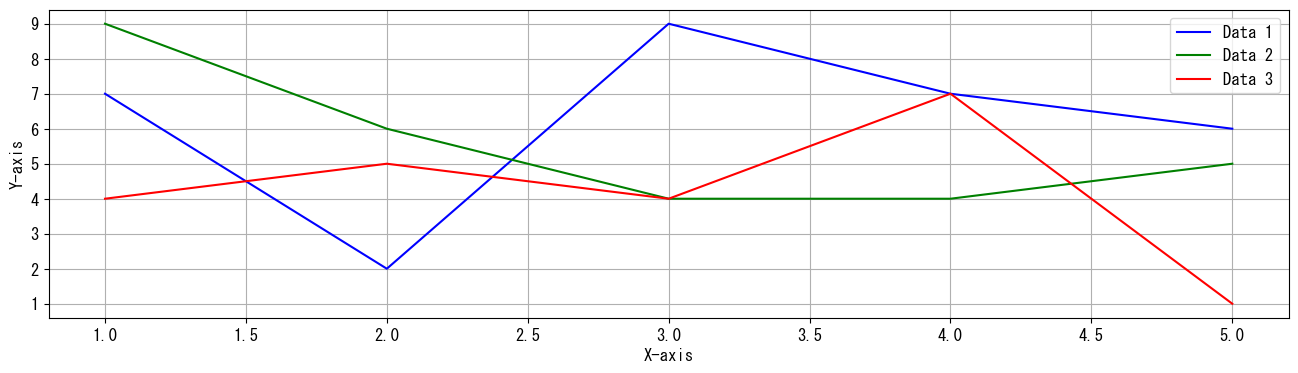

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# サンプルデータを作成
data_frames = [pd.DataFrame({'X': np.arange(1, 6), 'Y': np.random.randint(1, 10, 5)}) for _ in range(3)]

# グラフのプロット
for i, df in enumerate(data_frames):
    # 色を変更するためのリスト
    colors = ['blue', 'green', 'red', 'cyan', 'magenta']
    
    # プロット
    plt.plot(df['X'], df['Y'], label=f'Data {i+1}', color=colors[i])

# グリッドや軸のラベル、凡例の追加
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# グラフを表示
plt.show()
